In [32]:
%matplotlib inline
#https://www.youtube.com/watch?v=wQ8BIBpya2k
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train =tf.keras.utils.normalize(x_train, axis=1)
x_test =tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2598 - accuracy: 0.9240
Epoch 2/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1054 - accuracy: 0.9669
Epoch 3/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0728 - accuracy: 0.9769


In [18]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0997 - accuracy: 0.9715
0.09971445607300848 0.9715


In [5]:
import matplotlib.pyplot as plt

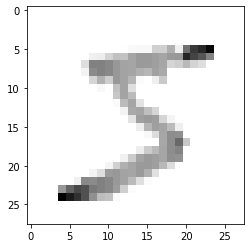

In [15]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
#print(x_train[0])

In [19]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [25]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [27]:
predictions = model.predict([x_test])

In [28]:
print(predictions)

[[2.9578868e-09 2.1167934e-07 3.1259340e-05 ... 9.9995363e-01
  5.0047549e-07 5.7693025e-08]
 [5.9893812e-11 2.9993627e-05 9.9996984e-01 ... 1.5146712e-10
  8.8623322e-09 2.0011866e-13]
 [4.2176809e-09 9.9987507e-01 6.3756461e-06 ... 1.0114209e-04
  5.3179660e-06 3.1121079e-08]
 ...
 [1.1150281e-09 4.3744723e-07 2.5058640e-08 ... 4.5248248e-06
  4.0323246e-07 3.1387906e-05]
 [8.1216328e-08 3.7653840e-06 2.8879049e-07 ... 1.6223621e-06
  3.7246173e-05 4.4668855e-09]
 [9.1403285e-07 5.0734053e-09 5.4467311e-08 ... 1.9308874e-10
  2.4713367e-08 1.0204024e-09]]


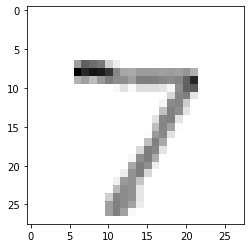

model predicts it is a: 
7


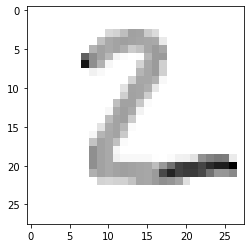

model predicts it is a: 
2


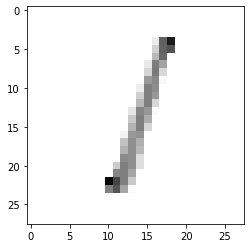

model predicts it is a: 
1


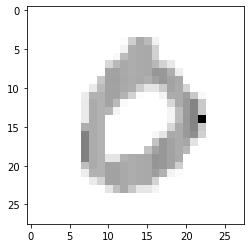

model predicts it is a: 
0


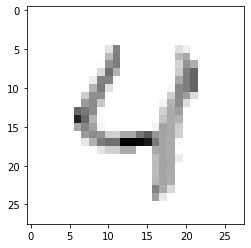

model predicts it is a: 
4


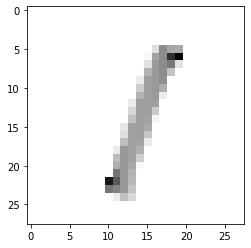

model predicts it is a: 
1


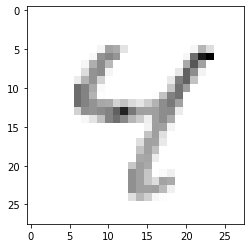

model predicts it is a: 
4


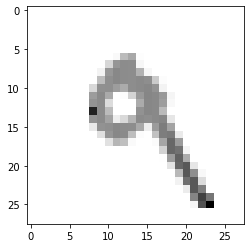

model predicts it is a: 
9


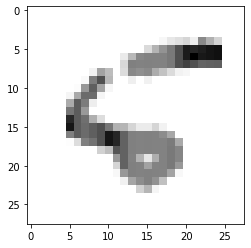

model predicts it is a: 
5


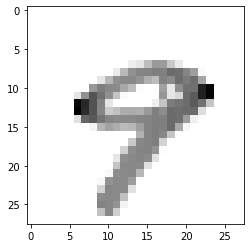

model predicts it is a: 
9


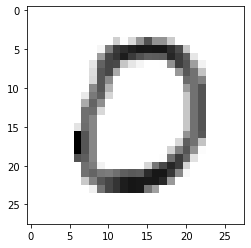

model predicts it is a: 
0


In [35]:
import numpy as np

for i in range(0,11):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.show()
    print("model predicts it is a: ")
    print(np.argmax(predictions[i]))